Basic Time Series Project

In [5]:
import pandas as pd
data  = pd.read_csv('fremont-bridge.csv', index_col = 'Date', parse_dates=True)
data

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0
...,...,...
2017-12-31 19:00:00,9.0,12.0
2017-12-31 20:00:00,6.0,8.0
2017-12-31 21:00:00,3.0,10.0


In [6]:
data.head()

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [8]:
data.columns = ["West", "East"]
data["Total"] = data["West"] + data["East"]
data

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0
...,...,...,...
2017-12-31 19:00:00,9.0,12.0,21.0
2017-12-31 20:00:00,6.0,8.0,14.0
2017-12-31 21:00:00,3.0,10.0,13.0


In [10]:
data.dropna().describe()

,West,East,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


Visualising The Data

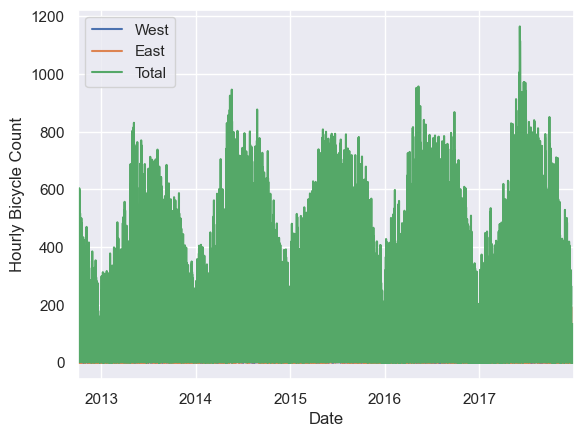

In [12]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
data.plot()
plt.ylabel("Hourly Bicycle Count")
plt.show()

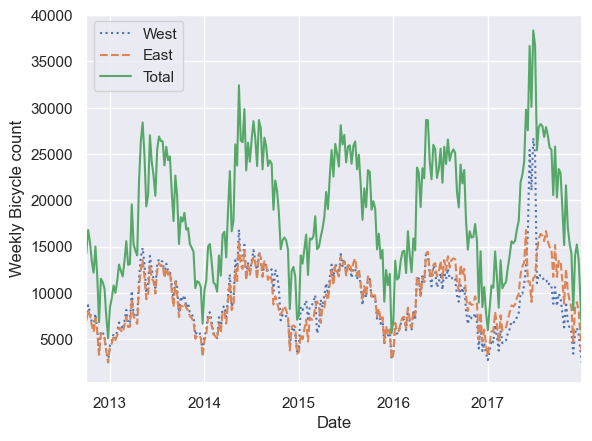

In [16]:
weekly = data.resample("W").sum()
weekly.plot(style = [":", '--', '-'])
plt.ylabel('Weekly Bicycle count')
plt.show()

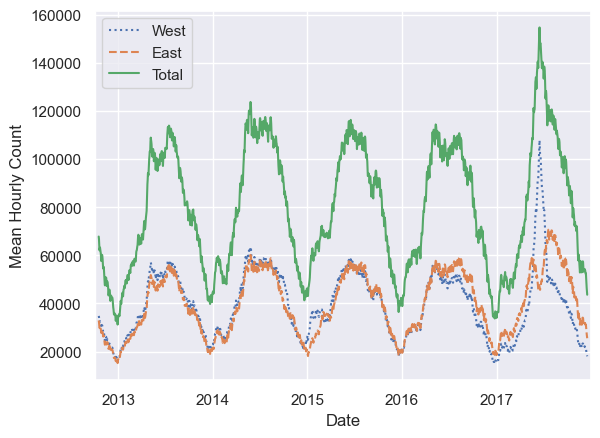

In [17]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('Mean Hourly Count')
plt.show()

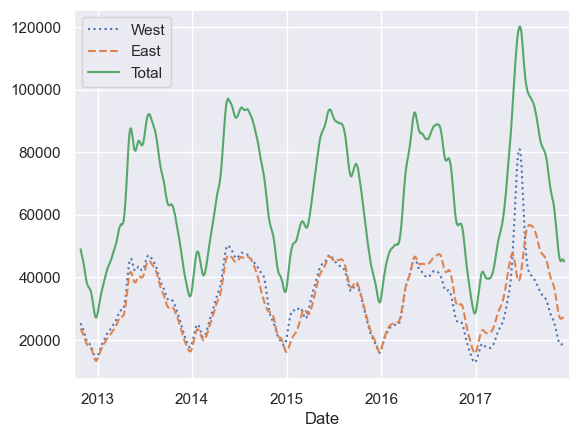

In [26]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style = [':', '--', '-'])
plt.show()

Digging Into The Data

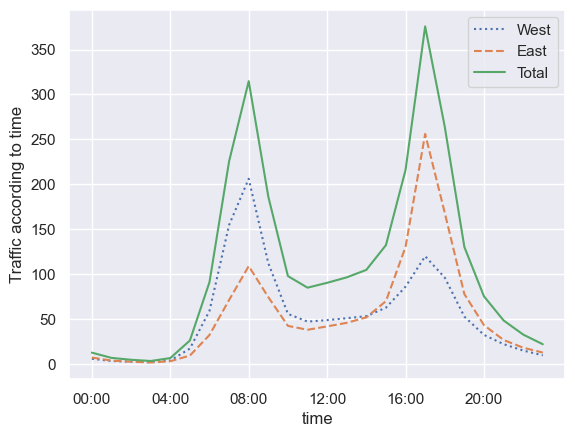

In [27]:
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks = hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()